<a href="https://colab.research.google.com/github/an24li/CODSOFT/blob/main/spammsg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [10]:
import pandas as pd

# Load the uploaded file from the correct path
data = pd.read_csv('/content/spam[1].csv', encoding='latin-1')

# Show the first few rows to confirm
data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [12]:
data.isna().sum()

,0
v1,0
v2,0
Unnamed: 2,5522
Unnamed: 3,5560
Unnamed: 4,5566


In [13]:
data.columns


Index(['v1', 'v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], dtype='object')

In [14]:
# Drop unnecessary columns
data.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis=1, inplace=True)

# Rename columns
data.rename(columns={'v1': 'target', 'v2': 'text'}, inplace=True)
data.head()


,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [15]:
data.describe()


,target,text
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [16]:
# Count the number of spam/ham
target_num = data['target'].value_counts()
target_num


,count
target,
ham,4825
spam,747


In [17]:
import re

# Number of characters (already correctly calculated)
data['num_characters'] = data['text'].apply(len)

# Number of words using string splitting (a simpler approach)
data['num_words'] = data['text'].apply(lambda x: len(x.split()))

# Number of sentences using regular expressions to find sentence-ending punctuation
data['num_sentences'] = data['text'].apply(lambda x: len(re.findall(r'[.!?]+', x)))

data.head()

,target,text,num_characters,num_words,num_sentences
0,ham,"Go until jurong point, crazy.. Available only ...",111,20,3
1,ham,Ok lar... Joking wif u oni...,29,6,2
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,28,1
3,ham,U dun say so early hor... U c already then say...,49,11,2
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,13,0


In [18]:
data[data['target'] == 'spam'][['num_characters', 'num_words', 'num_sentences']].describe()


,num_characters,num_words,num_sentences
count,747.000000,747.000000,747.000000
mean,138.866131,23.851406,2.973226
std,29.183082,5.811898,1.831898
min,13.000000,2.000000,0.000000
25%,132.500000,22.000000,2.000000
50%,149.000000,25.000000,3.000000
75%,157.000000,28.000000,4.000000
max,224.000000,35.000000,9.000000


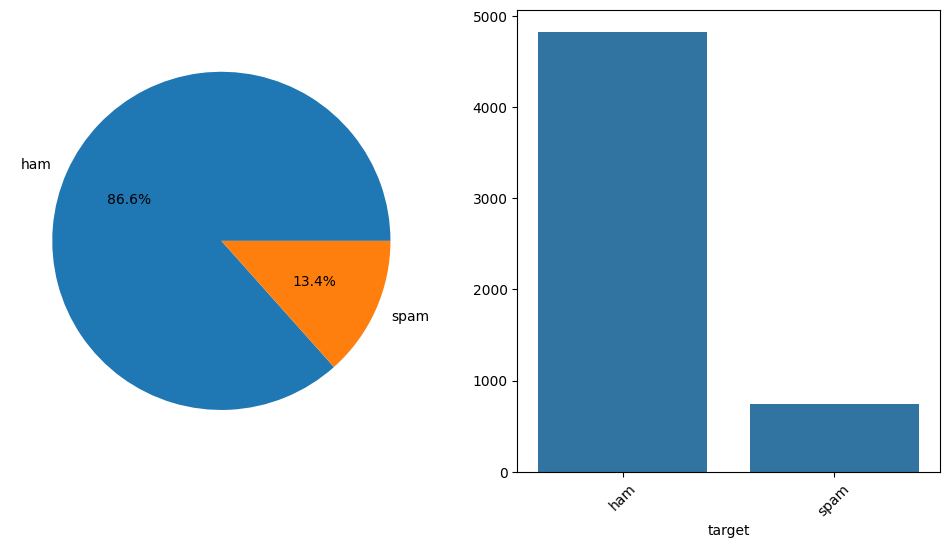

In [19]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

ax1.pie(target_num, autopct='%1.1f%%', labels=target_num.index)
sns.barplot(x=target_num.index, y=target_num.values, ax=ax2)

plt.xticks(rotation=45)
plt.show()


In [20]:
def hist_plot(x, fig):
    plt.figure(figsize=(7, 5))
    sns.histplot(data[data['target'] == 'ham'][x], color='blue', label='Ham', kde=True)
    sns.histplot(data[data['target'] == 'spam'][x], color='red', label='Spam', kde=True)
    plt.legend()
    plt.title(f'Distribution of {x}')
    plt.show()


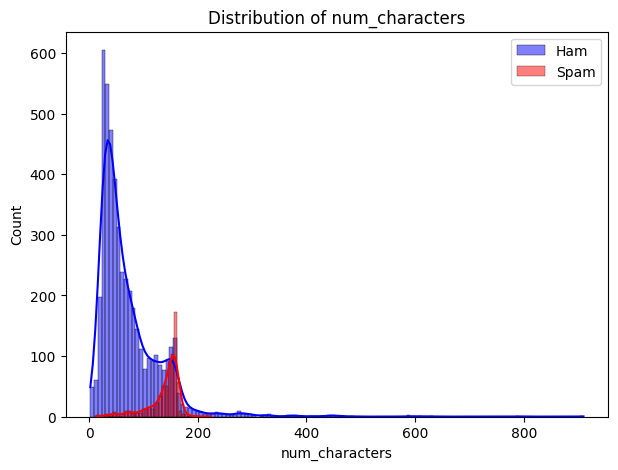

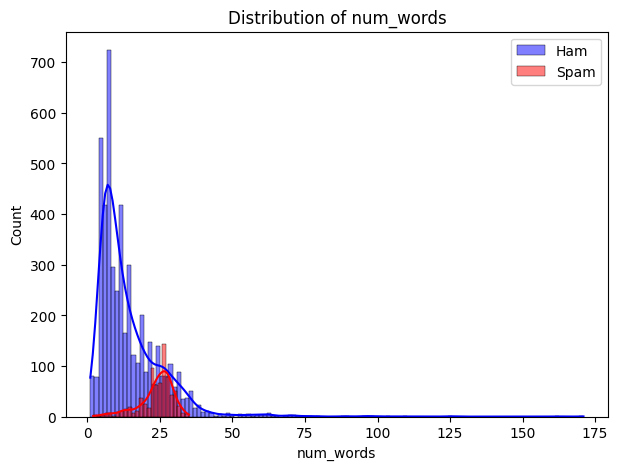

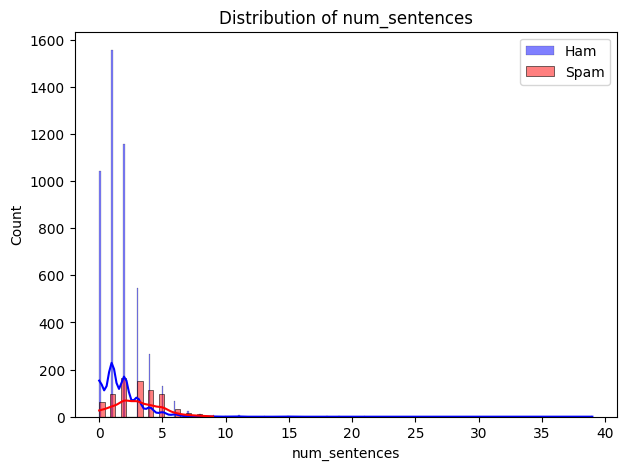

In [21]:
hist_plot('num_characters', 1)
hist_plot('num_words', 2)
hist_plot('num_sentences', 3)


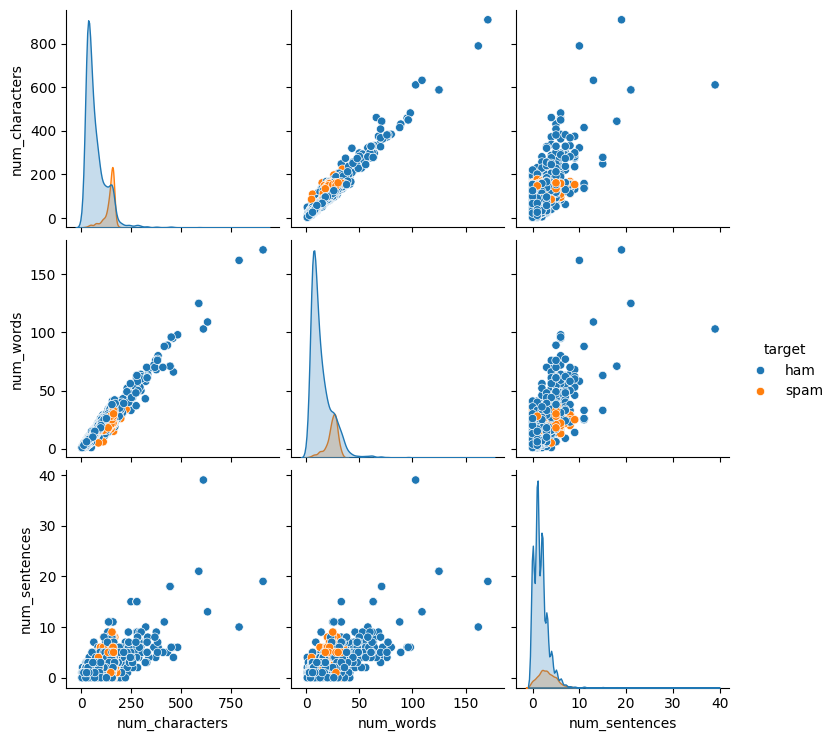

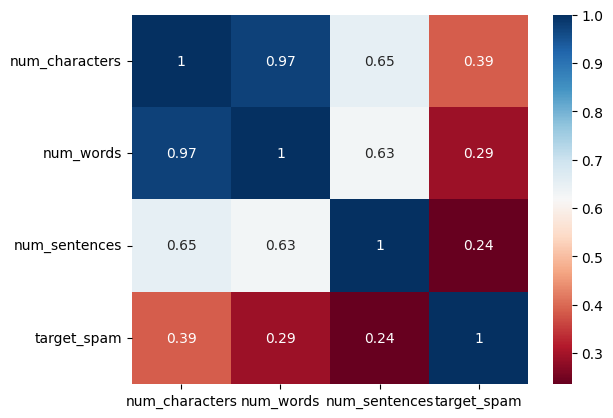

In [22]:
sns.pairplot(data, hue='target')
plt.show()
# One-hot encode the target variable
data = pd.concat([data, pd.get_dummies(data['target'], prefix='target', drop_first=True, dtype='int64')], axis=1)
data.drop('target', axis=1, inplace=True)

data_corr = data.select_dtypes('int64').corr()
sns.heatmap(data_corr, annot=True, cmap='RdBu')
plt.show()


In [27]:
import string
import nltk
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords

ps = PorterStemmer()

def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)

    y = []
    for i in text:
        if i.isalnum():
            y.append(i)

    text = y[:]
    y.clear()

    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)

    text = y[:]
    y.clear()

    for i in text:
        y.append(ps.stem(i))

    return " ".join(y)

In [29]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Create the 'transformed_text' column correctly
data['transformed_text'] = data['text'].apply(transform_text)

# Initialize TF-IDF vectorizer
tfidf = TfidfVectorizer(max_features=3000)

# Transform the text data into numerical format
X = tfidf.fit_transform(data['transformed_text']).toarray()

# Target variable (ham = 0, spam = 1)
y = data['target_spam']


LookupError: 
**********************************************************************
  Resource [93mpunkt_tab[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('punkt_tab')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mtokenizers/punkt_tab/english/[0m

  Searched in:
    - '/root/nltk_data'
    - '/usr/nltk_data'
    - '/usr/share/nltk_data'
    - '/usr/lib/nltk_data'
    - '/usr/share/nltk_data'
    - '/usr/local/share/nltk_data'
    - '/usr/lib/nltk_data'
    - '/usr/local/lib/nltk_data'
**********************************************************************


In [26]:
import pandas as pd

# Load the dataset
data = pd.read_csv('/tmp/spam.csv', encoding='latin-1')
data = data[['v1', 'v2']]
data.columns = ['target', 'text']
display(data.head())

FileNotFoundError: [Errno 2] No such file or directory: '/tmp/spam.csv'

In [32]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [38]:
import nltk
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [40]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Transform the text column using your function
data['transformed_text'] = data['text'].apply(transform_text)

# Use TF-IDF to convert text into numerical features
vectorizer = TfidfVectorizer(max_features=3000)
X = vectorizer.fit_transform(data['transformed_text']).toarray()

# Output variable (0 for ham, 1 for spam)
y = data['target_spam']


In [41]:
from sklearn.model_selection import train_test_split

# 22% data will be used for testing
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.22, random_state=42, shuffle=True
)


In [42]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)


LogisticRegression()

Accuracy: 0.9453507340946167


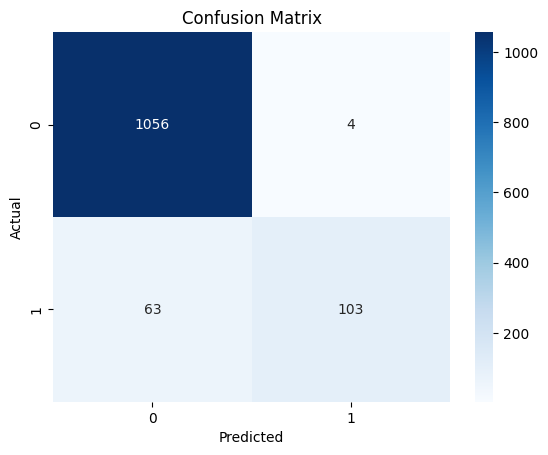

In [43]:
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

y_pred = model.predict(X_test)

# Accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


Accuracy: 0.9453507340946167


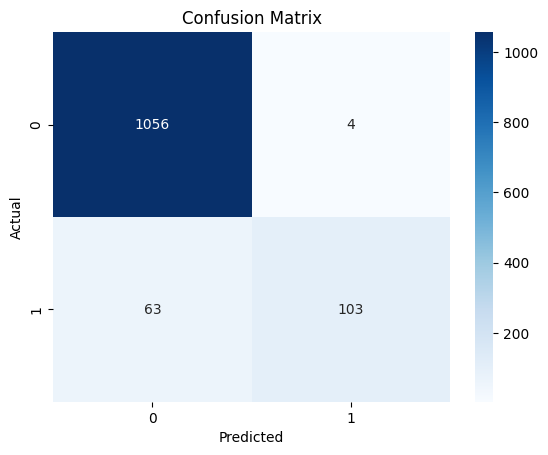

In [44]:
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

y_pred = model.predict(X_test)

# Accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


In [45]:
msg = ["Congratulations! You've won a prize! Call now."]
msg_transformed = vectorizer.transform([transform_text(msg[0])])
print(model.predict(msg_transformed))  # 1 = spam


[1]
